This notebook provides a workflow for plotting Figures 1 and 2 for the following paper

Bataille, C., Al Khourdajie, A., H. de Coninck, K. de Kleijne, L. J. Nilsson, I. Bashmakov, S. Davis and P. S. Fennell, ‘Defining ‘abated’ fossil fuel and industrial process emissions’. 

Date: 14 April 2025

In [1]:
# Load packages
import pyam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# 1) Load and pre-process data

In [2]:
# Load data V1.1
path = 'C:/data/ar6_data/'
data_file = pd.read_csv(path +"AR6_Scenarios_Database_World_v1.1.csv")

# pyam data_file
df_ar6 = pyam.IamDataFrame(data_file)

In [3]:
df_ar6

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.0, AIM/CGE 2.1, AIM/CGE 2.2, ... WITCH-GLOBIOM 4.4 (109)
 * scenario : 1, 1.5C, 1.5C A, 1.5C B, 1.5C C, ... peak2025_DemandLow_FossilLow_TechHigh (939)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (1393)
   unit     : %, EJ, EJ/yr, GW, GW/yr, GWh, GWh/yr, ... years (68)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)

In [4]:
# Load the metadata
metadata = pd.read_excel(path + "AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx",
sheet_name = "meta")

In [5]:
# pyam the full metadata
df_ar6.load_meta(path + "AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx",
sheet_name = "meta")


[WARNING] 09:46:14 - pyam.core: Ignoring meta indicators for the following scenarios:
       model              scenario
0  Reference                  CEDS
1  Reference             EDGAR AR6
2  Reference           EMBERS 2020
3  Reference              IEA 2019
4  Reference  Solar-Wind-composite
...


In [6]:
df_ar6

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.0, AIM/CGE 2.1, AIM/CGE 2.2, ... history (110)
 * scenario : 1, 1.5C, 1.5C A, 1.5C B, 1.5C C, ... scen (945)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (1393)
   unit     : %, EJ, EJ/yr, GW, GW/yr, GWh, GWh/yr, ... years (68)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)
Meta indicators:
   Category (object) failed-vetting, C3, C5, C6, C7, C4, C1, ... C8 (10)
   Category_name (object) failed-vetting, ... C8: exceed warming of 4°C (>=50%) (10)
   Category_subset (object) C1a_NZGHGs, C4, C1b_+veGHGs, C2, C5, C7, ... nan (12)
   Subset_Ch4 (object) ... (6)
   Category_Vetting_historical (object) ... (11)
   ...

In [7]:
# Filtering for scenarios that passed historical vetting 
df_ar6_vetted = df_ar6.filter(
    Vetting_historical = "Pass"
)
df_ar6_vetted

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.0, AIM/CGE 2.1, AIM/CGE 2.2, ... WITCH-GLOBIOM 4.4 (78)
 * scenario : SSP1-26, SSP1-34, SSP1-45, SSP1-Baseline, SSP4-26, ... SSP4-19 (707)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (1376)
   unit     : %, EJ, EJ/yr, GW, GW/yr, GWh, GWh/yr, ... years (65)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)
Meta indicators:
   Category (object) C3, C5, C6, C7, C4, C1, no-climate-assessment, C2, C8 (9)
   Category_name (object) C3: limit warming to 2°C (>67%), ... (9)
   Category_subset (object) C3y_+veGHGs, C5, C6, C7, C4, C1a_NZGHGs, ... C8 (11)
   Subset_Ch4 (object) Limit to 2C (>67%) immediate 2020 action, ... (6)
   Category_Vetting_historical (object) C3, C5, C6, C7, C4, C1, ... C8 (9)
   ...

# 2) Figure 1 Data and Plot

In [8]:
# Filtering for scenarios with category allocation 
df_ar6_climate_c1_c2_c3 = df_ar6_vetted.filter(
    Category = ["C1","C2", "C3"]
)
df_ar6_climate_c1_c2_c3

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.0, AIM/CGE 2.1, AIM/CGE 2.2, ... WITCH-GLOBIOM 4.4 (38)
 * scenario : SSP1-26, SSP4-26, CD-LINKS_NPi2020_1000, ... CD-LINKS_NPi2020_1600 (309)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (1262)
   unit     : W/m^2, dimensionless, Mt CH4/yr, Mt CO2/yr, ... bn vkm/yr (62)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)
Meta indicators:
   Category (object) C3, C1, C2 (3)
   Category_name (object) C3: limit warming to 2°C (>67%), ... (3)
   Category_subset (object) C3y_+veGHGs, C1a_NZGHGs, C3x_NZGHGs, C2, C1b_+veGHGs (5)
   Subset_Ch4 (object) Limit to 2C (>67%) immediate 2020 action, ... (4)
   Category_Vetting_historical (object) C3, C1, C2 (3)
   ...

In [9]:
# Check the number of vetted scenarios under each scenario category
df_ar6_climate_c1_c2_c3.meta.groupby(['Category']).count()

,Category_name,Category_subset,Subset_Ch4,Category_Vetting_historical,IMP_marker,Literature Reference (if applicable),Policy_category,Policy_category_name,Project_study,CO2 emissions 2030 Gt CO2/yr,...,P67 peak warming (FaIRv1.6.2),Median warming in 2100 (FaIRv1.6.2),Median year of peak warming (FaIRv1.6.2),Exceedance Probability 1.5C (FaIRv1.6.2),Exceedance Probability 2.0C (FaIRv1.6.2),Exceedance Probability 3.0C (FaIRv1.6.2),IMP_color_rgb,IMP_color_hex,Category_color_rgb,Category_color_hex
Category,,,,,,,,,,,,,,,,,,,,,
C1,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,3,3,97,97
C2,133,133,42,133,133,133,133,133,133,133,...,133,133,133,133,133,133,0,0,133,133
C3,311,311,301,311,311,311,311,311,310,311,...,311,311,311,311,311,311,2,2,311,311


In [10]:
# Check the number of vetted scenarios under each policy category
df_ar6_climate_c1_c2_c3.meta.groupby(['Policy_category']).count()

,Category,Category_name,Category_subset,Subset_Ch4,Category_Vetting_historical,IMP_marker,Literature Reference (if applicable),Policy_category_name,Project_study,CO2 emissions 2030 Gt CO2/yr,...,P67 peak warming (FaIRv1.6.2),Median warming in 2100 (FaIRv1.6.2),Median year of peak warming (FaIRv1.6.2),Exceedance Probability 1.5C (FaIRv1.6.2),Exceedance Probability 2.0C (FaIRv1.6.2),Exceedance Probability 3.0C (FaIRv1.6.2),IMP_color_rgb,IMP_color_hex,Category_color_rgb,Category_color_hex
Policy_category,,,,,,,,,,,,,,,,,,,,,
P0_2,29,29,29,23,29,29,29,29,29,29,...,29,29,29,29,29,29,0,0,29,29
P2,46,46,46,33,46,46,46,46,46,46,...,46,46,46,46,46,46,0,0,46,46
P2a,231,231,231,190,231,231,231,231,231,231,...,231,231,231,231,231,231,1,1,231,231
P2b,49,49,49,32,49,49,49,49,49,49,...,49,49,49,49,49,49,1,1,49,49
P2c,27,27,27,21,27,27,27,27,27,27,...,27,27,27,27,27,27,2,2,27,27
P3a,2,2,2,0,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,2,2
P3b,139,139,139,139,139,139,139,139,138,139,...,139,139,139,139,139,139,0,0,139,139
P3c,16,16,16,0,16,16,16,16,16,16,...,16,16,16,16,16,16,1,1,16,16
P4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,2,2


In [11]:
# Filtering for scenarios with category allocation 
df_ar6_climate_c5_P1c_P3b = df_ar6_vetted.filter(
    Category = ["C5"],
    Policy_category = ["P1c", "P3b"]
)
df_ar6_climate_c5_P1c_P3b

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.1, AIM/CGE 2.2, COFFEE 1.1, GCAM 5.3, ... WITCH 5.0 (14)
 * scenario : CD-LINKS_INDC2030i_1600, EN_INDCi2030_1600, ... SusDev_SSP2-NDC (48)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (1069)
   unit     : W/m^2, dimensionless, Mt CH4/yr, Mt CO2/yr, ... bn m2/yr (56)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)
Meta indicators:
   Category (object) C5 (1)
   Category_name (object) C5: limit warming to 2.5°C (>50%) (1)
   Category_subset (object) C5 (1)
   Subset_Ch4 (object) nan, NDCs announced prior to COP26 (2)
   Category_Vetting_historical (object) C5 (1)
   ...

In [12]:
# Check the number of vetted scenarios under each scenario category
df_ar6_climate_c5_P1c_P3b.meta.groupby(['Category']).count()

,Category_name,Category_subset,Subset_Ch4,Category_Vetting_historical,IMP_marker,Literature Reference (if applicable),Policy_category,Policy_category_name,Project_study,CO2 emissions 2030 Gt CO2/yr,...,P67 peak warming (FaIRv1.6.2),Median warming in 2100 (FaIRv1.6.2),Median year of peak warming (FaIRv1.6.2),Exceedance Probability 1.5C (FaIRv1.6.2),Exceedance Probability 2.0C (FaIRv1.6.2),Exceedance Probability 3.0C (FaIRv1.6.2),IMP_color_rgb,IMP_color_hex,Category_color_rgb,Category_color_hex
Category,,,,,,,,,,,,,,,,,,,,,
C5,99,99,15,99,99,99,99,99,99,99,...,99,99,99,99,99,99,0,0,99,99


In [13]:
# Check the number of vetted scenarios under each policy category
df_ar6_climate_c5_P1c_P3b.meta.groupby(['Policy_category']).count()

,Category,Category_name,Category_subset,Subset_Ch4,Category_Vetting_historical,IMP_marker,Literature Reference (if applicable),Policy_category_name,Project_study,CO2 emissions 2030 Gt CO2/yr,...,P67 peak warming (FaIRv1.6.2),Median warming in 2100 (FaIRv1.6.2),Median year of peak warming (FaIRv1.6.2),Exceedance Probability 1.5C (FaIRv1.6.2),Exceedance Probability 2.0C (FaIRv1.6.2),Exceedance Probability 3.0C (FaIRv1.6.2),IMP_color_rgb,IMP_color_hex,Category_color_rgb,Category_color_hex
Policy_category,,,,,,,,,,,,,,,,,,,,,
P1c,16,16,16,15,16,16,16,16,16,16,...,16,16,16,16,16,16,0,0,16,16
P3b,83,83,83,0,83,83,83,83,83,83,...,83,83,83,83,83,83,0,0,83,83


In [14]:
# Using Pyam package, append df_ar6_climate_c1_c2_c3 with df_ar6_climate_c5_P1c_P3b to df_ar6_climate_c1_c2_c3_c5
df_ar6_climate_c1_c2_c3_c5 = df_ar6_climate_c1_c2_c3.append(df_ar6_climate_c5_P1c_P3b)


In [15]:
df_ar6_climate_c1_c2_c3_c5

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.0, AIM/CGE 2.1, AIM/CGE 2.2, ... WITCH-GLOBIOM 4.4 (38)
 * scenario : 1.5C, ADVANCE_2020_1.5C-2100, ADVANCE_2020_Med2C, ... WB2C (354)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (1262)
   unit     : %, EJ/yr, GW, GW/yr, GWh, GWh/yr, Index (2010 = 1), ... years (62)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)
Meta indicators:
   Category (object) C3, C1, C2, C5 (4)
   Category_name (object) C3: limit warming to 2°C (>67%), ... (4)
   Category_subset (object) C3y_+veGHGs, C1a_NZGHGs, C3x_NZGHGs, C2, ... C5 (6)
   Subset_Ch4 (object) Limit to 2C (>67%) immediate 2020 action, ... (5)
   Category_Vetting_historical (object) C3, C1, C2, C5 (4)
   ...

In [16]:
# Check the number of vetted scenarios under each scenario category
df_ar6_climate_c1_c2_c3_c5.meta.groupby(['Category']).count()

,Category_name,Category_subset,Subset_Ch4,Category_Vetting_historical,IMP_marker,Literature Reference (if applicable),Policy_category,Policy_category_name,Project_study,CO2 emissions 2030 Gt CO2/yr,...,P67 peak warming (FaIRv1.6.2),Median warming in 2100 (FaIRv1.6.2),Median year of peak warming (FaIRv1.6.2),Exceedance Probability 1.5C (FaIRv1.6.2),Exceedance Probability 2.0C (FaIRv1.6.2),Exceedance Probability 3.0C (FaIRv1.6.2),IMP_color_rgb,IMP_color_hex,Category_color_rgb,Category_color_hex
Category,,,,,,,,,,,,,,,,,,,,,
C1,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,3,3,97,97
C2,133,133,42,133,133,133,133,133,133,133,...,133,133,133,133,133,133,0,0,133,133
C3,311,311,301,311,311,311,311,311,310,311,...,311,311,311,311,311,311,2,2,311,311
C5,99,99,15,99,99,99,99,99,99,99,...,99,99,99,99,99,99,0,0,99,99


In [17]:
# Check the number of vetted scenarios under each policy category
df_ar6_climate_c1_c2_c3_c5.meta.groupby(['Policy_category']).count()

,Category,Category_name,Category_subset,Subset_Ch4,Category_Vetting_historical,IMP_marker,Literature Reference (if applicable),Policy_category_name,Project_study,CO2 emissions 2030 Gt CO2/yr,...,P67 peak warming (FaIRv1.6.2),Median warming in 2100 (FaIRv1.6.2),Median year of peak warming (FaIRv1.6.2),Exceedance Probability 1.5C (FaIRv1.6.2),Exceedance Probability 2.0C (FaIRv1.6.2),Exceedance Probability 3.0C (FaIRv1.6.2),IMP_color_rgb,IMP_color_hex,Category_color_rgb,Category_color_hex
Policy_category,,,,,,,,,,,,,,,,,,,,,
P0_2,29,29,29,23,29,29,29,29,29,29,...,29,29,29,29,29,29,0,0,29,29
P1c,16,16,16,15,16,16,16,16,16,16,...,16,16,16,16,16,16,0,0,16,16
P2,46,46,46,33,46,46,46,46,46,46,...,46,46,46,46,46,46,0,0,46,46
P2a,231,231,231,190,231,231,231,231,231,231,...,231,231,231,231,231,231,1,1,231,231
P2b,49,49,49,32,49,49,49,49,49,49,...,49,49,49,49,49,49,1,1,49,49
P2c,27,27,27,21,27,27,27,27,27,27,...,27,27,27,27,27,27,2,2,27,27
P3a,2,2,2,0,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,2,2
P3b,222,222,222,139,222,222,222,222,221,222,...,222,222,222,222,222,222,0,0,222,222
P3c,16,16,16,0,16,16,16,16,16,16,...,16,16,16,16,16,16,1,1,16,16


In [18]:
# List of variables of interest

df_ar6_climate_c1_c2_c3_c5 = df_ar6_climate_c1_c2_c3_c5.filter(variable=
                                                               [

        'Primary Energy|Coal',
        'Primary Energy|Coal|w/o CCS',
        'Primary Energy|Coal|w/ CCS',
        'Primary Energy|Gas',
        'Primary Energy|Gas|w/o CCS',
        'Primary Energy|Gas|w/ CCS',                                                             ]
) 



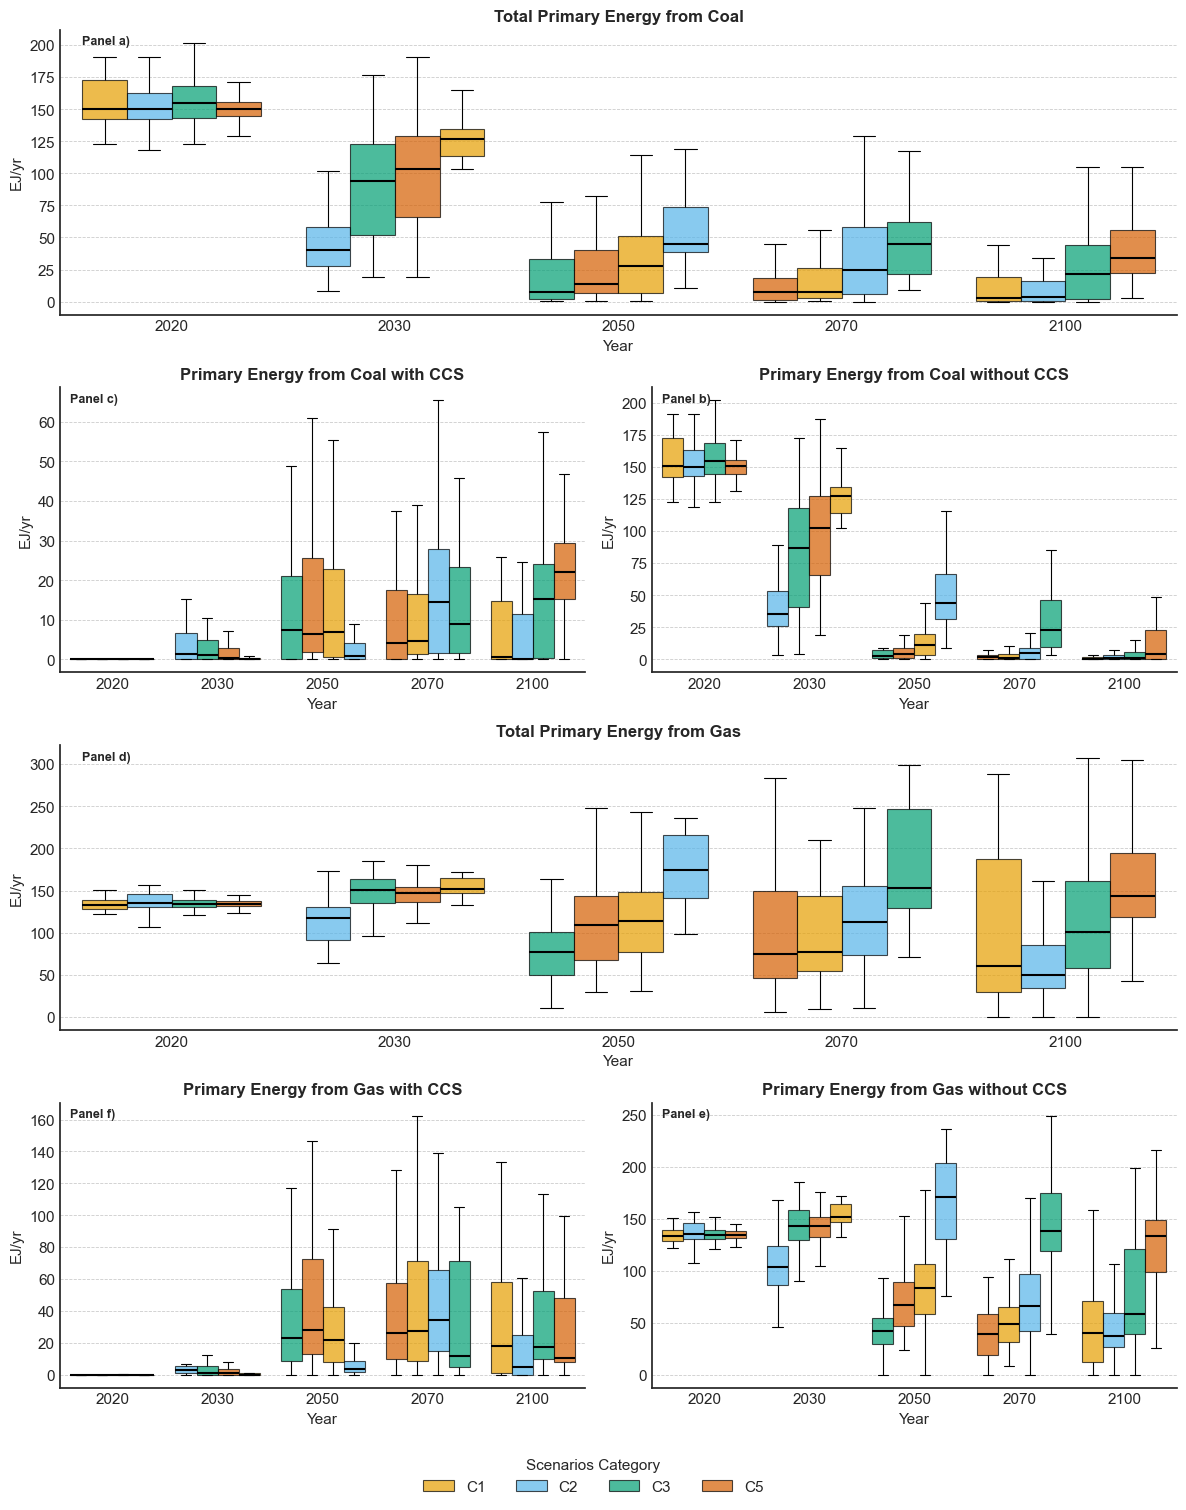

In [19]:
# Set up the style parameters
plt.style.use('seaborn-v0_8-white')
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.which'] = 'major'
mpl.rcParams['axes.grid.axis'] = 'y'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.6
mpl.rcParams['grid.color'] = '#cccccc'
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (12, 15)
mpl.rcParams['savefig.dpi'] = 150
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
mpl.rcParams['font.size'] = 11
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 11

# Updated variables to plot
vars = [
    'Primary Energy|Coal',
    'Primary Energy|Coal|w/o CCS',
    'Primary Energy|Coal|w/ CCS',
    'Primary Energy|Gas',
    'Primary Energy|Gas|w/o CCS',
    'Primary Energy|Gas|w/ CCS',
]

# titles for each plot
titles = [
    'Total Primary Energy from Coal',
    'Primary Energy from Coal without CCS',
    'Primary Energy from Coal with CCS',
    'Total Primary Energy from Gas',
    'Primary Energy from Gas without CCS',
    'Primary Energy from Gas with CCS',
]

# Set up the subplots
fig = plt.figure()
gs = fig.add_gridspec(4, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1, 1])

# Create subplots
axes = [
    fig.add_subplot(gs[0, :]),  # Wide panel for Total Coal
    fig.add_subplot(gs[1, 1]),  # Coal w/o CCS
    fig.add_subplot(gs[1, 0]),  # Coal w/ CCS
    fig.add_subplot(gs[2, :]),  # Wide panel for Total Gas
    fig.add_subplot(gs[3, 1]),  # Gas w/o CCS
    fig.add_subplot(gs[3, 0]),  # Gas w/ CCS
]

# Color-blind friendly palette (Okabe-Ito)
colors = ['#E69F00', '#56B4E9', '#009E73', '#D55E00']

# Panel labels
panel_labels = ['Panel a)', 'Panel b)', 'Panel c)', 'Panel d)', 'Panel e)', 'Panel f)']

# Create box plots with custom colors
for i, (var, ax, title) in enumerate(zip(vars, axes, titles)):
    bp = df_ar6_climate_c1_c2_c3_c5.filter(variable=var, year=[2020, 2030, 2050, 2070, 2100]).\
        plot.box(by='Category', showfliers=False, ax=ax, patch_artist=True, 
               boxprops=dict(linewidth=0.8, edgecolor='black'),
               medianprops=dict(linewidth=1.5, color='black'),
               whiskerprops=dict(linewidth=0.8, color='black'),
               capprops=dict(linewidth=0.8, color='black'))
               
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Year')
    ax.get_legend().remove()
    
    # Add panel label
    ax.text(0.02, 0.98, panel_labels[i], transform=ax.transAxes, 
            fontsize=9, fontweight='bold', va='top')
    
    # Apply custom colours to each box
    for j, patch in enumerate(ax.patches):
        patch.set_facecolor(colors[j % len(colors)])
        patch.set_edgecolor('black')
        patch.set_alpha(0.7)


# Create custom legend
handles = [plt.Rectangle((0,0),1,1, facecolor=colors[i], alpha=0.7, edgecolor='black', linewidth=0.8) for i in range(4)]
fig.legend(handles, ['C1', 'C2', 'C3', 'C5'], loc='lower center', ncol=4, frameon=False, 
           bbox_to_anchor=(0.5, -0.01), title='Scenarios Category')

fig.tight_layout()
plt.subplots_adjust(bottom=0.07)

# Save the figure
plt.savefig('boxplot_energy.png', dpi=300, bbox_inches='tight')
plt.show()

# 3) Figure 2 Data and Plot

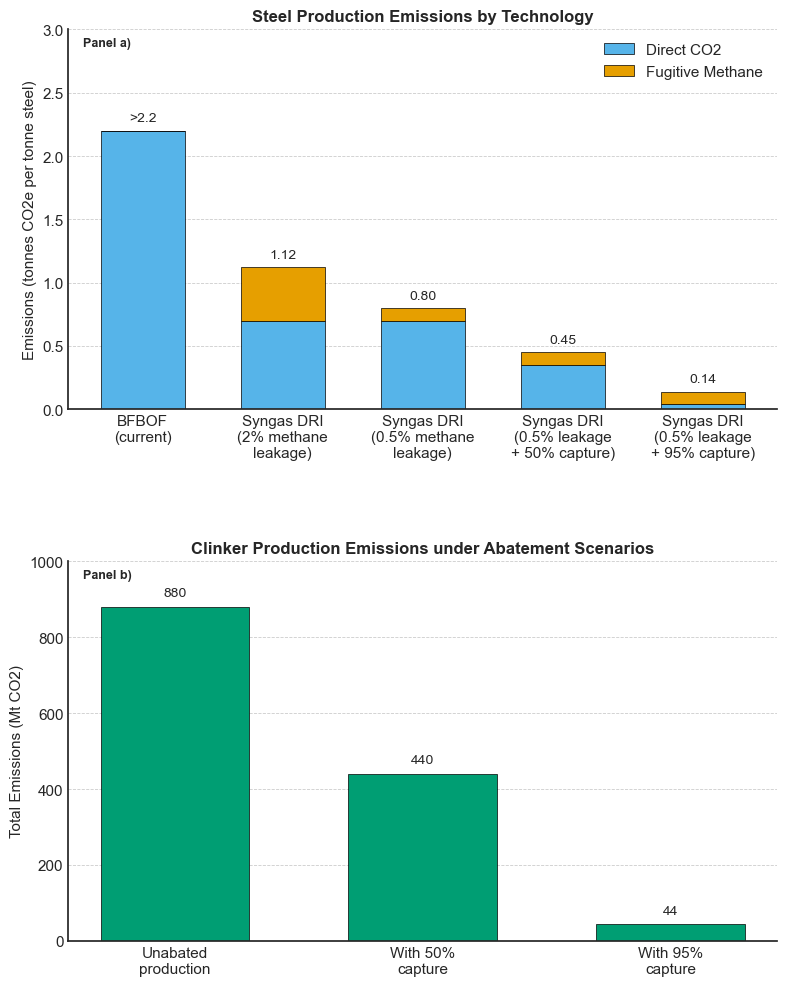

In [30]:
# Set up the style parameters
plt.style.use('seaborn-v0_8-white')
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.which'] = 'major'
mpl.rcParams['axes.grid.axis'] = 'y'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.6
mpl.rcParams['grid.color'] = '#cccccc'
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 10)
mpl.rcParams['savefig.dpi'] = 150
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
mpl.rcParams['font.size'] = 11
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 11

# Create figure with two panels
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Panel 1: Steel Production Stacked Bar Chart
technologies = [
    'BFBOF\n(current)',
    'Syngas DRI\n(2% methane\nleakage)',
    'Syngas DRI\n(0.5% methane\nleakage)',
    'Syngas DRI\n(0.5% leakage\n+ 50% capture)',
    'Syngas DRI\n(0.5% leakage\n+ 95% capture)'
]

direct_co2 = [2.2, 0.7, 0.7, 0.35, 0.04]
fugitive_methane = [0, 0.42, 0.1, 0.1, 0.1]  # Set BFBOF fugitive to 0

# Color-blind friendly colors (Okabe-Ito palette)
co2_color = '#56B4E9'  # Blue
methane_color = '#E69F00'  # Orange

# Create the stacked bar chart
width = 0.6
p1 = ax1.bar(technologies, direct_co2, width, label='Direct CO2', color=co2_color, edgecolor='black', linewidth=0.5)
p2 = ax1.bar(technologies, fugitive_methane, width, bottom=direct_co2, label='Fugitive Methane', color=methane_color, edgecolor='black', linewidth=0.5)

# Add total values on top of bars
for i, tech in enumerate(technologies):
    if i == 0:  # BFBOF
        ax1.text(i, direct_co2[i] + 0.05, ">2.2", ha='center', va='bottom', fontsize=10)
    else:
        total = direct_co2[i] + fugitive_methane[i]
        ax1.text(i, total + 0.05, f'{total:.2f}', ha='center', va='bottom', fontsize=10)

# Add panel label and title
ax1.text(0.02, 0.98, 'Panel a)', transform=ax1.transAxes, fontsize=9, fontweight='bold', va='top')
ax1.set_title("Steel Production Emissions by Technology", fontsize=12, fontweight='bold')

# Add labels and format panel 1
ax1.set_ylabel('Emissions (tonnes CO2e per tonne steel)')
ax1.legend(frameon=False, loc='upper right')
ax1.set_ylim(0, 3)

# Panel 2: Cement Production Bar Chart
strategies = [
    'Unabated\nproduction',
    'With 50%\ncapture',
    'With 95%\ncapture',
    # 'With 75% clinker\nreduction\n+ 95% capture'
]

emissions = [880, 440, 44,
            #  11
            ]

# Color-blind friendly green (from Okabe-Ito palette)
cement_color = '#009E73'  

# Create the bar chart
bars = ax2.bar(strategies, emissions, width=0.6, color=cement_color, edgecolor='black', linewidth=0.5)

# Add panel label and title
ax2.text(0.02, 0.98, 'Panel b)', transform=ax2.transAxes, fontsize=9, fontweight='bold', va='top')
ax2.set_title("Clinker Production Emissions under Abatement Scenarios", fontsize=12, fontweight='bold')

# Add values on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 20,
            f'{height:.0f}', ha='center', va='bottom', fontsize=10)

ax2.set_ylabel('Total Emissions (Mt CO2)')
ax2.set_ylim(0, 1000)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

# Save the figure
plt.savefig('steel_cement_emissions.png', dpi=300, bbox_inches='tight')
plt.show()